In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# a posição na quadra parece uma posição mais útil para nossa análise. Podemos tentar encontrar uma posição a partir da latitude e longitude.
# vamos analisar a distribuicao de lat e lon, e usar esses valores para criar uma função que as transforme para features com mais informação para nosso modelo
data = catalog.load("primary_dev")

[03/24/25 10:47:47] INFO     Loading data from primary_dev (CSVDataset)...                      ]8;id=978898;file:///home/rosana/.conda/envs/PD_env_1/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=485616;file:///home/rosana/.conda/envs/PD_env_1/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

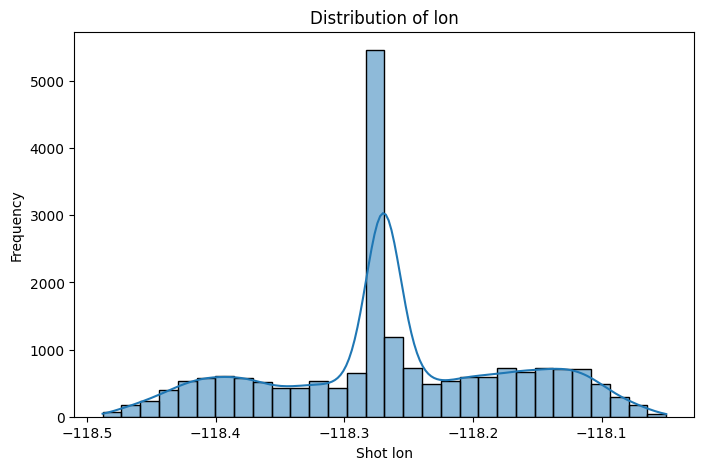

In [3]:
# verificando os dados de lat e lon
# primeiramente, da longitude

plt.figure(figsize=(8, 5))
sns.histplot(data["lon"], bins=30, kde=True) 
plt.xlabel("Shot lon")
plt.ylabel("Frequency")
plt.title("Distribution of lon")
plt.show()

In [4]:
minimo_lon = data['lon'].min()
maximo_lon = data['lon'].max()
moda_lon = data['lon'].mode().values  
mediana_lon = data['lon'].median()

print(f"Mínimo: {minimo_lon}")
print(f"Máximo: {maximo_lon}")
print(f"Moda: {moda_lon}")
print(f"Mediana: {mediana_lon}")

Mínimo: -118.4878
Máximo: -118.0498
Moda: [-118.2698]
Mediana: -118.2698


In [5]:
# a partir dessa análise dessa distribuição, podemos inferir que a localização na quadra nesse eixo varia de -118.4878 a -118.0498; 
# podemos ainda definir como ponto 0 o ponto mais comum para os shots. Pela distribuição, podemos inferi-lo como o ponto médio da quadra nesse eixo
# criamos entao uma nova feature, considerando esse eixo com o ponto 0 na moda:
data['lon_quadra'] = data['lon'] + 118.2698

In [6]:
data

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag,lon_quadra
0,34.0443,-118.4268,10,1,False,15,False,-0.157
1,33.9093,-118.3708,7,1,False,16,True,-0.101
2,33.8693,-118.1318,6,1,False,22,False,0.138
3,34.0443,-118.2698,6,2,False,0,True,0.000
4,34.0553,-118.4148,9,3,False,14,False,-0.145
...,...,...,...,...,...,...,...,...
20280,33.9443,-118.3828,11,4,True,15,False,-0.113
20281,34.0443,-118.2698,7,4,True,0,False,0.000
20282,33.9963,-118.2688,6,4,True,4,False,0.001
20283,33.8783,-118.4038,3,4,True,21,True,-0.134


In [7]:
minimo_processed_lon = data['lon_quadra'].min()
maximo_processed_lon = data['lon_quadra'].max()
moda_processed_lon = data['lon_quadra'].mode().values  
mediana_processed_lon = data['lon_quadra'].median()

print(f"Mínimo: {minimo_processed_lon}")
print(f"Máximo: {maximo_processed_lon}")
print(f"Moda: {moda_processed_lon}")
print(f"Mediana: {mediana_processed_lon}")

Mínimo: -0.2179999999999893
Máximo: 0.21999999999999886
Moda: [0.]
Mediana: 0.0


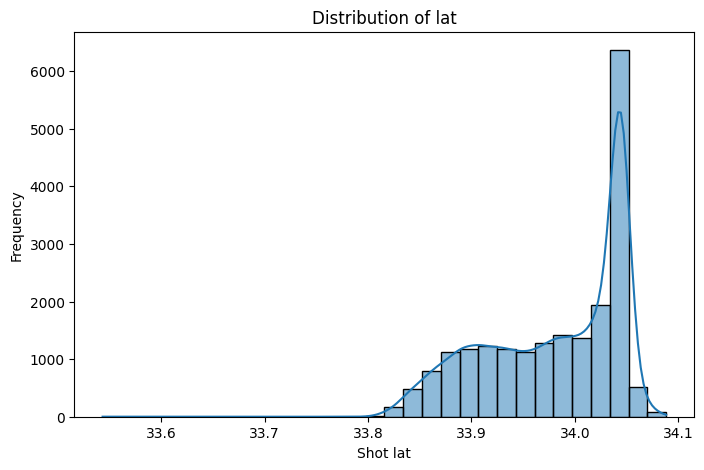

In [8]:
# faremos agora a mesma análise com a latitude:

plt.figure(figsize=(8, 5))
sns.histplot(data["lat"], bins=30, kde=True) 
plt.xlabel("Shot lat")
plt.ylabel("Frequency")
plt.title("Distribution of lat")
plt.show()

In [9]:
minimo_lat = data['lat'].min()
maximo_lat = data['lat'].max()
moda_lat = data['lat'].mode().values  
mediana_lat = data['lat'].median()

print(f"Mínimo: {minimo_lat}")
print(f"Máximo: {maximo_lat}")
print(f"Moda: {moda_lat}")
print(f"Mediana: {mediana_lat}")

Mínimo: 33.5433
Máximo: 34.0883
Moda: [34.0443]
Mediana: 33.9993


In [10]:
# de forma semelhante ao que foi feito com a longitude, podemos inferir que o ponto "ótimo" da quadra para os lançamentos nesse eixo parece ser o ponto com maior número de ocorrências
# ou seja, podemos pegar a moda e fazer novamente uma transformação semelhante, deixando ele como ponto central do nosso eixo:
data['lat_quadra'] = data['lat'] - 34.0443

In [11]:
data

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag,lon_quadra,lat_quadra
0,34.0443,-118.4268,10,1,False,15,False,-0.157,0.000
1,33.9093,-118.3708,7,1,False,16,True,-0.101,-0.135
2,33.8693,-118.1318,6,1,False,22,False,0.138,-0.175
3,34.0443,-118.2698,6,2,False,0,True,0.000,0.000
4,34.0553,-118.4148,9,3,False,14,False,-0.145,0.011
...,...,...,...,...,...,...,...,...,...
20280,33.9443,-118.3828,11,4,True,15,False,-0.113,-0.100
20281,34.0443,-118.2698,7,4,True,0,False,0.000,0.000
20282,33.9963,-118.2688,6,4,True,4,False,0.001,-0.048
20283,33.8783,-118.4038,3,4,True,21,True,-0.134,-0.166


In [12]:
minimo_lat_quadra = data['lat_quadra'].min()
maximo_lat_quadra = data['lat_quadra'].max()
moda_lat_quadra = data['lat_quadra'].mode().values  
mediana_lat_quadra = data['lat_quadra'].median()

print(f"Mínimo: {minimo_lat_quadra}")
print(f"Máximo: {maximo_lat_quadra}")
print(f"Moda: {moda_lat_quadra}")
print(f"Mediana: {mediana_lat_quadra}")

Mínimo: -0.5009999999999977
Máximo: 0.04399999999999693
Moda: [0.]
Mediana: -0.045000000000001705


In [13]:
#vamos descartar agora lat e lon originais:
data = data.drop(columns=["lat", "lon"])

In [14]:
data

,minutes_remaining,period,playoffs,shot_distance,shot_made_flag,lon_quadra,lat_quadra
0,10,1,False,15,False,-0.157,0.000
1,7,1,False,16,True,-0.101,-0.135
2,6,1,False,22,False,0.138,-0.175
3,6,2,False,0,True,0.000,0.000
4,9,3,False,14,False,-0.145,0.011
...,...,...,...,...,...,...,...
20280,11,4,True,15,False,-0.113,-0.100
20281,7,4,True,0,False,0.000,0.000
20282,6,4,True,4,False,0.001,-0.048
20283,3,4,True,21,True,-0.134,-0.166


In [15]:
# por fim, para validar que a transformação faz sentido, podemos observar que, quando shot_distance é 0, lon_quadra e lat_quadra tenderão a ser 0:

data[data['shot_distance']==0]

,minutes_remaining,period,playoffs,shot_distance,shot_made_flag,lon_quadra,lat_quadra
3,6,2,False,0,True,0.000,0.000
5,8,3,False,0,True,0.000,0.000
19,2,3,False,0,False,0.000,0.000
27,10,3,False,0,True,0.007,-0.004
30,3,3,False,0,True,-0.004,-0.004
...,...,...,...,...,...,...,...
20228,2,1,True,0,True,0.000,0.000
20262,9,3,True,0,True,0.000,0.000
20269,8,1,True,0,False,0.000,0.000
20275,0,2,True,0,False,0.000,0.000
